## 統計的仮説検定

統計的仮説検定は、標本を使って、母集団に関する統計的な”判断”を下す方法です。判断の基準といて、確率的な表現を使うことが特徴です。

#### 1変量データの$t$検定

- 1変量データの$t$検定は以下の特徴があります。
  - 対象：平均値
  - 判断すること：平均値が”ある値”と異なると言えるかどうか
  
  例：内容量が50gと書かれたスナック菓子があったとします。しかし49g、51g、など全ての製品で完璧に50gと言うことが難しいです。1変量データの$t$検定は「内容量が50gと異なると言えるかどうか」を判断することができます。


#### 有意差

- 文字通り、”意味のある差”です。基本的に以下の三つの条件がある時に有意差と言います。
   1. サンプルサイズが大きい
   2. 測定精度が高くても、分散が大きい
   3. 平均値が大きく離れている

- この三つの条件を全てあわせた指標を$t$値とよび、以下のように計算されます。

  $
  t値 = \frac{標本平均-比較対象値}{標準偏差/\sqrt(サンプルサイズ)} = \frac{標本平均-比較対象値}{標準誤差}
  $

- スナックの例で言うと、$t$値が大きければ50gと「有意差あり」と判断ができることになります。

  $
  t値 = \frac{標本平均-50}{標準誤差}
  $
  
  
####  統計的仮説検定の枠組み：帰無仮説・対立仮説

- 統計的仮説検定では、ある仮説を立てて、その仮説を棄却するしないかと言う判断を下すことで、データからの客観的な判断を試みます。


    - 棄却される対象となる最初の仮説を**帰無仮説**と呼びます
    - 帰無仮説と対立する仮説を**対立仮説**と呼びます
    
   スナック菓子の平均値が50gと言えるかどうかを判断する場合には、以下のように仮説を設定します。
   - 帰無仮説：スナック菓子の平均重量は50gである
   - 対立仮説：スナック菓子の平均重量は50gと異なる
   
   帰無仮説が棄却された、すなわち帰無仮説が間違っていると判断されたならば、有意差あり、すなわち「スナック菓子の平均重量は50gと異なる」と判断することなります。少々遠回りして判断を下すことになりますが、厳密性を重んじた結果です。


####  $p$値
- $p$値とは、標本と帰無仮説との矛盾の目安となる指標です。$p$値が小さい程、帰無仮説と標本が矛盾していると考えます。
- $p$値が**有意水準**を下回った時に、帰無仮説を棄却します。

#### $t$検定


  　$
  　t値 = \frac{標本平均-50}{標準誤差}
  　$
  
  - 母集団が平均50の正規分布であると仮定すると、標本の$t$値が$t$分布を従うことになります。
  - t分布の累積分布関数を使うと「母平均を50と仮定した時に、$t$値が$t_{標本}$を下回る確率」を$\alpha$とします。
  
  
 #### $p$値の計算方法
 両側検定を行うことを前提として$p$値を計算します。
 今回の標本から計算された$t$値を$t_{標本}$とします。$t$分布の累積分布関数を使うと「母平均を50と仮定した時に、$t$値が$t_{標本}$を下回る確率」を計算することができます。この確率を$\alpha$とします。
 
   - $p$値は以下のように計算されます。
   
   $
   p値 = (1-\alpha)x2
   $


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()

%precision 3
%matplotlib inline


In [3]:
#Create random data
norm_dist = stats.norm(loc=49, scale=4)
data = norm_dist.rvs(size=20)
print(data)

[48.476 51.975 51.175 51.5   48.764 46.601 50.135 53.512 48.447 44.634
 43.72  51.227 42.983 44.64  51.716 45.849 44.916 49.734 53.322 56.269]


### $t$検定の実装：$t$値の計算

このデータを対象に、1標本の＄t＄検定を実行します。
以下の要領で検定を行います。
- 帰無仮説：スナック菓子の平均重量は50gである。
- 対立仮説：スナック菓子の平均重量は50gと異なる。
- 有意水準は５％とします。$p$値が０.０５を下回れば、帰無仮説は棄却され、スナック菓子の重量は有意に50gと異なることと主張できることになります。

In [4]:
mu = np.mean(data)
mu

48.97973239744992

In [5]:
df = len(data)-1
df

19

In [6]:
sigma = np.std(data, ddof=1)
se = sigma / np.sqrt(len(data))
se

0.8287877530009577

In [7]:
t_value = (mu - 50)/se
t_value

-1.2310360509741978

### 𝑡 検定の実装：$p$値の計算

- 母集団が正規分布を仮定すると、$t$値が$t$分布を従うことになります。$t$分布の累積分布関数が使えます。
- 両側検定を行うことを前提として 𝑝 値を計算します。 今回の標本から計算された 𝑡 値を 𝑡標本 とします。 𝑡 分布の累積分布関数を使うと「母平均を50と仮定した時に、 𝑡 値が 𝑡標本 を下回る確率」を計算することができます。この確率を 𝛼 とします。
- 1-$\alpha$が小さければ、「$t$値が$t_{標本}$より上回る確率が低い（すなわち有意差あり）」
- $p$値が小さければ、有意差あり


In [8]:
alpha = stats.t.cdf(t_value, df=df)
p = (1-alpha)*2 #両側検定
p

1.766668864328313

$p$値が0.05より小さいと有意差あり、このデータの場合は有意差ありと言えないため、帰無仮説を棄却できない。

「スナック菓子の平均重量は50gである。」

In [9]:
#Create random data
norm_dist = stats.norm(loc=56, scale=4)
data1 = norm_dist.rvs(size=20)
print(data1)

[49.406 56.472 57.526 58.785 59.604 49.489 52.457 56.438 54.581 54.852
 54.098 55.057 55.98  57.136 52.878 56.947 57.762 55.044 57.049 56.746]


In [11]:
#標本平均
mu = np.mean(data1)
mu

#自由度
df = len(data1)-1
df

#標準誤差
sigma = np.std(data1, ddof=1)
se = sigma / np.sqrt(len(data1))
se

#t値
t_value = (mu - 50)/se
t_value

#p値
alpha = stats.t.cdf(t_value, df=df)
p = (1-alpha)*2 #両側検定
print('p値は{}'.format(p))

p値は3.2909363234523425e-08


$p$値が0.05より小さいと有意差あり、このデータの場合は有意差ありと言え、帰無仮説を棄却し、対立仮説を採択します。

「スナック菓子の平均重量は50gと異なる。」

### 2群のデータに対する$t$検定

２つの変数の間で、平均値に差があるかどうかを判断します。たとえば、薬を飲む前と飲んだ後で、体温に差が出るかどうかを調べる場合。


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()

%matplotlib inline 
%precision 3

'%.3f'

In [3]:
paired_test_data = pd.read_csv('paired-t-test.csv')
print(paired_test_data.head(5))

  person medicine  body_temperature
0      A   before              36.2
1      B   before              36.2
2      C   before              35.3
3      D   before              36.1
4      E   before              36.1


このデータを対象に、対応する$t$検定を実施します。
以下の要領で検定を実施します。
- 帰無仮説：薬を飲む前と後で体温は変わらない
- 対立仮設：薬を飲む前と後の体温が異なっている

有意水準は5%とします。$p$値が0.05を下回れば、帰無仮説が棄却され、薬を飲むことで体温の有意な変化が認められると主張できる。   

### 対応する$t$検定の実装

- 薬を飲む前と飲んだ後の体温の差を計算します。
- この差の値の平均値が0と異なるかどうを1群のデータに対する$t$検定を行う。

In [7]:
before = paired_test_data.query('medicine == "before"')["body_temperature"]
after = paired_test_data.query('medicine == "after"')["body_temperature"]


before = np.array(before)
after = np.array(after)

diff = after - before
diff


array([ 0.6, -0.1,  1.5,  1. ,  0.8])

In [8]:
#この差の値の平均値が0と異なるかどうを1群のデータに対する 𝑡 検定を行う。
stats.ttest_1samp(diff, 0)

Ttest_1sampResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

In [9]:
stats.ttest_rel(before, after)

Ttest_relResult(statistic=-2.901693483620596, pvalue=0.044043109730074276)

$p$値が0.05を下を回ったので、帰無仮説が棄却され、薬を飲むことで体温の有意な変化が認められる

### 対応のない$t$検定の実装
対応のない$t$検定は「平均値の差」に注目します。対応がある$t$検定だと「データの差」をとってから1群のデータに対する$t$検定しました。そこが2つの$t$検定の違いです。

平均値の差に基づいて$t$値を計算するばあいは、$t$値の計算式が若干複雑になります。

- 1群のデータに対する$t$検定における$t$値

  $
  t値 = \frac{標本平均-比較対象値}{標準偏差/\sqrt(サンプルサイズ)} = \frac{標本平均-比較対象値}{標準誤差}
  $

- 対応のない$t$検定における$t$値

  $
  t値 = \frac{\hat{\mu_{x}} - \hat{\mu_{y}}}{\sqrt{\hat{\delta}_x^2/m + \hat{\delta}_y^2/n }}
  $

  $\mu_{x}$は$x$の標本平均で、$\mu_{y}$は$y$の標本平均です。
  $m$は$x$のサンプルサイズで、$n$は$y$のサンプルサイズです。
  $\hat{\delta}_x^2$は$x$の不偏分散で、$\hat{\delta}_y^2$は$y$の不偏分散です。

In [11]:
mean_before = np.mean(before)
mean_after = np.mean(after)

sigma_before = np.var(before, ddof=1)
sigma_after = np.var(after, ddof=1)

m = len(before)
n = len(after)

t_value = (mean_after - mean_before)/(np.sqrt(sigma_before/m + sigma_after/n))
t_value

3.1557282344421034

In [12]:
stats.ttest_ind(after, before, equal_var= False)

Ttest_indResult(statistic=3.1557282344421034, pvalue=0.013484775682079892)

$p$値が0.05を下を回ったので、有意差ありという結果になりました。

### 分散分析の直感的な考え方：誤差と効果の分離

- 効果の大きさのこと：群間変動、誤差の大きさのことを群内変動


In [4]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

weather = [
    "cloudy", "cloudy",
    "rainy",  "rainy",
    "sunny", "sunny"
]

beer = [6, 8, 2, 4, 10, 12]

weather_beer = pd.DataFrame({
    "beer": beer,
    "weather": weather
})
print(weather_beer.head(6))

   beer weather
0     6  cloudy
1     8  cloudy
2     2   rainy
3     4   rainy
4    10   sunny
5    12   sunny


<AxesSubplot:xlabel='weather', ylabel='beer'>

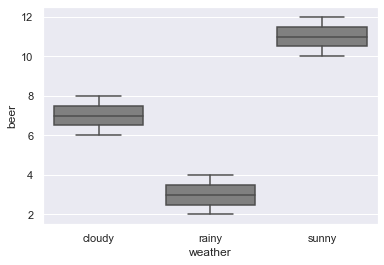

In [6]:
import seaborn as sns
sns.set()

sns.boxplot(x="weather", y="beer",
           data=weather_beer, color='gray')

In [9]:
#分散分析1,群間・群内平方和の計算

effect = [7, 7, 3, 3, 11, 11] #各天気の平均値が期待値

#群間の平方和：効果
mu_effect = np.mean(effect)
squared_model = np.sum((effect - mu_effect) **2)
squared_model

64.0

In [10]:
#群内の平方和：誤差
resid = weather_beer. beer - effect
squared_resid = np.sum(resid**2)
squared_resid

6

In [11]:
df_model = 2 #群間変動の自由度: 3-1
df_resid = 3 #群内変動の自由度: 6-3

In [13]:
#　群間の平均平方(分散)
variance_model = squared_model / df_model
variance_model

32.0

In [14]:
#　群内の平均平方(分散)
variance_resid = squared_resid / df_resid
variance_resid

2.0

In [15]:
# F比を計算
f_ratio = variance_model/ variance_resid
f_ratio

16.0

In [17]:
# p値を計算
import scipy as sp
1 - sp.stats.f.cdf(x=f_ratio, dfn=df_model, dfd=df_resid)

0.02509457330439091

$p$値が0.05より小さいので、天気によって売り上げは有意に変化すると判断できます。

In [ ]:
print(sm.stats.anova_lm)